### Reinforcement Learning - Resource Manager

Version 1.8:

- Changes to Environment
    - Add second Resource: Food
    - Use same Logic, see if the agent balances
        - Fun fact - he didn't
        - Implemented Balance reward based on a threshold
    - Implement Danger
- Make it possible to learn from given QTable



### Imports

In [1]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt

### Environment

In [2]:
from environment.ResourceManagerEnvironment_v1_8 import ResourceManagerEnv
from agent.QLearning import QLearningAgent
from SaveQLearningResults import save_results

In [3]:
register(
    id='Resource-Manager-v1-8',
    entry_point='environment.ResourceManagerEnvironment_v1_8:ResourceManagerEnv',
    kwargs={
        'grid_size': 20,            #set to desired grid size
        'window_size': 300,         #set to desired window size
        'num_water_resources': 10,  #set to desired number of water resources
        'num_food_resources': 10,   #set to desired number of food resources
        'render_mode': 'rgb_array',      #set to desired render mode ('human' or 'rgb_array')
        'danger_mode': True,        #set to True to enable danger mode - spawn them lions!
        'max_episode_steps': 1000  #set to desired max episode steps
    },
)


## Training

In [4]:

env = gym.make('Resource-Manager-v1-8')

#Hyperparameters:

learning_rate=0.1
discount_factor=0.9
exploration_prob=1.0
epsilon_decay=0.995
replay_buffer_size=2000
batch_size=256

agent = QLearningAgent(env, learning_rate, discount_factor, exploration_prob, epsilon_decay)
num_episodes = 2000

episode_rewards = []
episode_water_resources = []
episode_food_resources = []
episode_max_steps = []

for episode in range(num_episodes):
    observation = env.reset()
    total_reward = 0

    while True:
        #select action using the Q-learning agent
        action = agent.select_action(observation)
        #take a step in the environment
        next_observation, reward, done, _, _ = env.step(action)
        total_reward += reward

        #update the Q-table
        agent.update_q_table(observation, action, reward, next_observation)

        observation = next_observation

        #sample a batch from the replay buffer and update the Q-table
        if len(agent.replay_buffer) >= agent.batch_size:
                    # Sample a batch from the replay buffer and update Q-values
                    batch = agent.sample_from_replay_buffer()
                    for experience in batch:
                        state, action, reward, next_state = experience
                        agent.update_q_table(state, action, reward, next_state)

        if done:
            break

    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)
    episode_food_resources.append(env.food_resource)
    episode_max_steps.append(env.num_step)

    print(f"Episode {episode + 1}, Total Steps: {env.num_step}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}, Total Food Resource: {env.food_resource}")

c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 20)
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a de

Lion ate the agent at [ 9 16]
Episode 1, Total Steps: 4, Total Reward: -960, Total Water Resource: 98.0, Total Food Resource: 98.0
Lion ate the agent at [ 9 16]
Episode 2, Total Steps: 6, Total Reward: -942, Total Water Resource: 97.0, Total Food Resource: 97.0
Lion ate the agent at [ 7 16]
Episode 3, Total Steps: 21, Total Reward: -776, Total Water Resource: 105.0, Total Food Resource: 90.0
Episode 4, Total Steps: 321, Total Reward: -14801, Total Water Resource: -0.5, Total Food Resource: 194.5
Episode 5, Total Steps: 290, Total Reward: -11175, Total Water Resource: -0.5, Total Food Resource: 199.5
Episode 6, Total Steps: 280, Total Reward: -9955, Total Water Resource: -0.5, Total Food Resource: 204.5
Episode 7, Total Steps: 221, Total Reward: -4307, Total Water Resource: -0.5, Total Food Resource: 204.5
Episode 8, Total Steps: 223, Total Reward: -4189, Total Water Resource: -0.5, Total Food Resource: 199.5
Episode 9, Total Steps: 224, Total Reward: -5289, Total Water Resource: -0.5, 

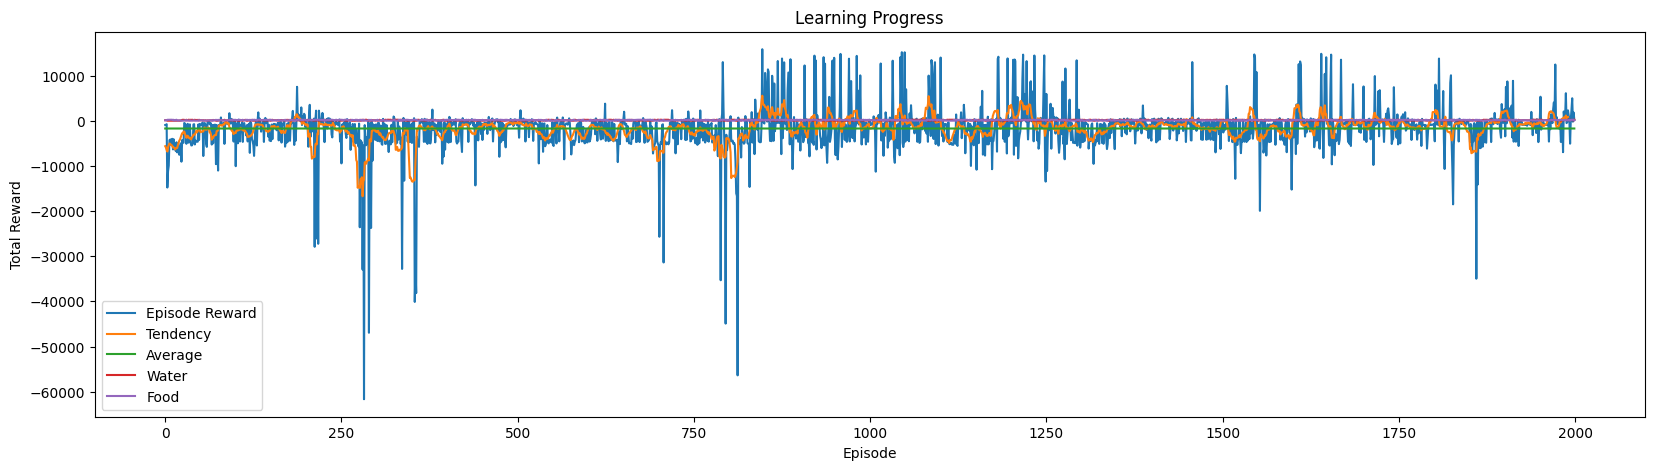

In [5]:
#Plot the total rewards
plt.figure(figsize=(20,5))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress')
#plot tendency curve
plt.plot(np.convolve(episode_rewards, np.ones((10,))/10, mode='valid'))
#plot average
plt.plot(np.ones(len(episode_rewards))*np.mean(episode_rewards))
plt.plot(episode_water_resources)
plt.plot(episode_food_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water', 'Food'])
plt.show()


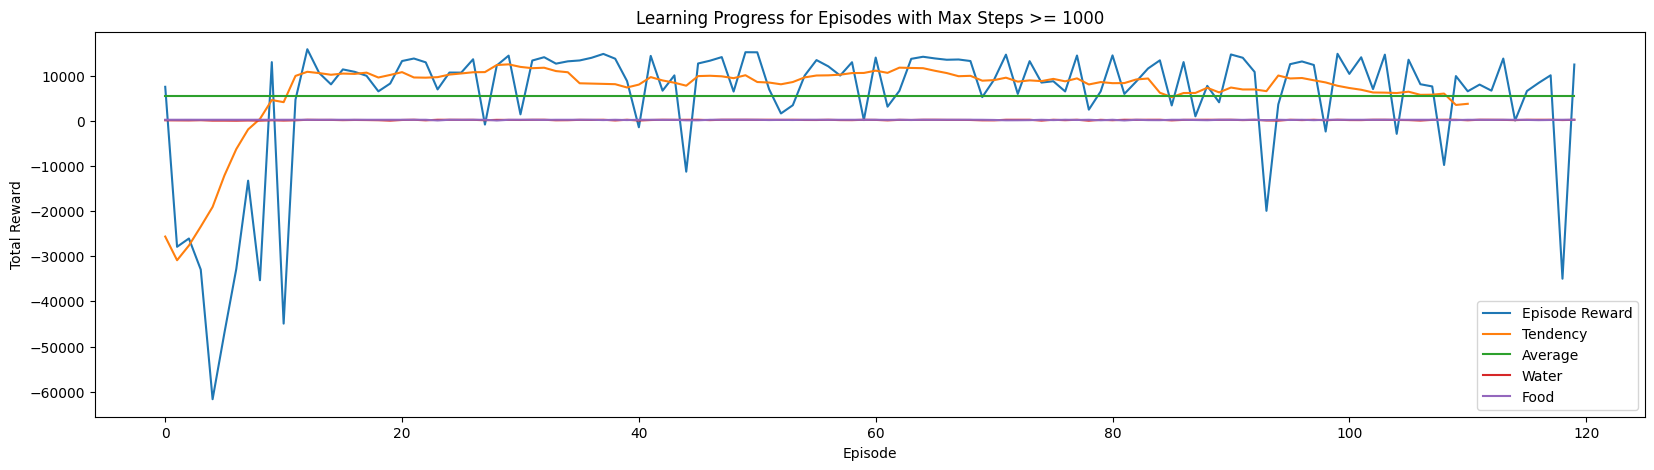

In [6]:
#filter episodes with max steps >= 1000
filtered_episodes = [(r, w, f, s) for r, w, f, s in zip(episode_rewards, episode_water_resources, episode_food_resources, episode_max_steps) if s >= 1000]

#unpack the filtered data
filtered_rewards, filtered_water_resources, filtered_food_resources, filtered_steps = zip(*filtered_episodes)

#plot the total rewards for filtered episodes
plt.figure(figsize=(20, 5))
plt.plot(filtered_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress for Episodes with Max Steps >= 1000')
plt.plot(np.convolve(filtered_rewards, np.ones((10,))/10, mode='valid'))
plt.plot(np.ones(len(filtered_rewards)) * np.mean(filtered_rewards))
plt.plot(filtered_water_resources)
plt.plot(filtered_food_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water', 'Food'])
plt.show()


Save Complete


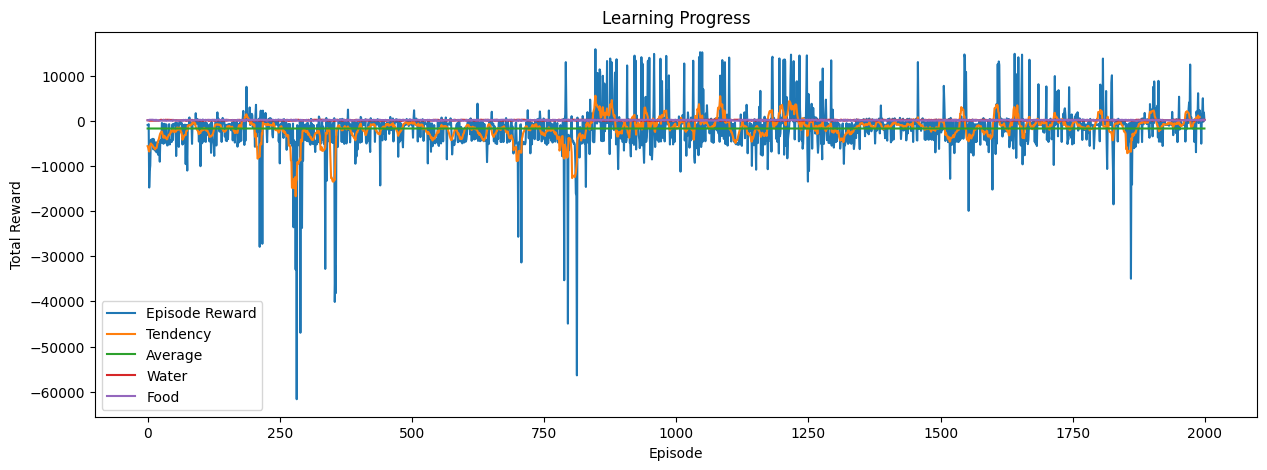

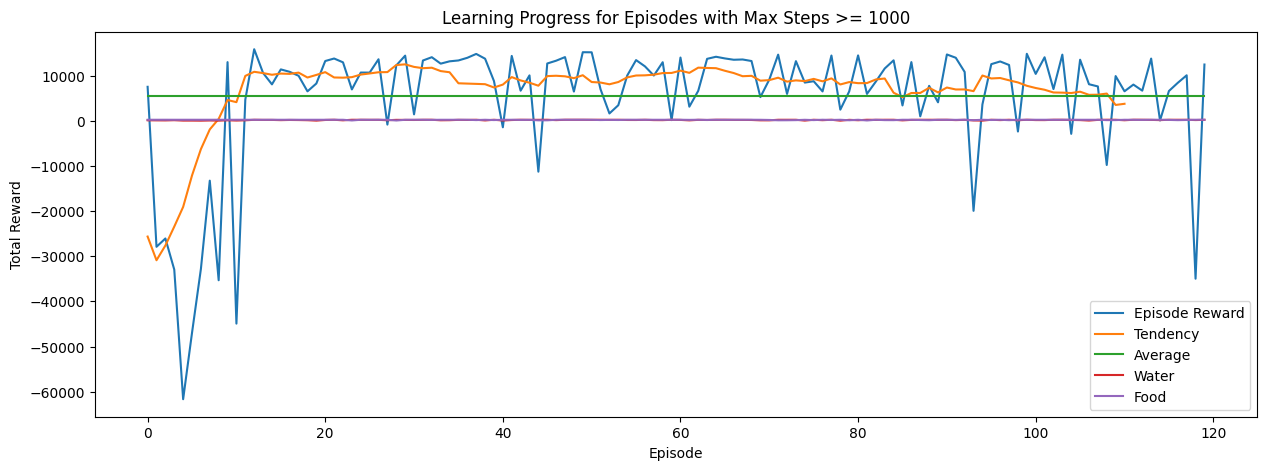

In [7]:
#Save results
save_results('MoreReplayBuffer', observation, agent.q_table, episode_rewards, episode_water_resources, episode_food_resources,
             episode_max_steps, learning_rate, discount_factor, exploration_prob, epsilon_decay, replay_buffer_size, batch_size)


## Continue Training with loaded Q-Table

In [13]:

env = gym.make('Resource-Manager-v1-8')

#Hyperparameters:
#load the hyperparameters from the saved results
loaded_hyperparameters = np.genfromtxt('Results_11-12-2023_21-15-50_MoreReplayBuffer/Hyperparameters/hyperparameters.txt', dtype=None, delimiter='=', encoding=None)
hyperparameters = {}

#fill the hyperparameters dictionary
for key, value in loaded_hyperparameters:
    hyperparameters[key.strip()] = float(value)

learning_rate = hyperparameters['learning_rate']
discount_factor = hyperparameters['discount_factor']
exploration_prob = hyperparameters['exploration_prob']
epsilon_decay = hyperparameters['epsilon_decay']
replay_buffer_size = hyperparameters['replay_buffer_size']
batch_size = hyperparameters['batch_size']

#Load Q Table and Observation - change to wanted results folder
loaded_q_table = np.loadtxt(f'Results_11-12-2023_21-15-50_MoreReplayBuffer/q_table.txt')
with open('Results_11-12-2023_21-15-50_MoreReplayBuffer/observation.txt', 'r') as file:
    loaded_observation_str = file.read()
loaded_observation_list = eval(loaded_observation_str)
loaded_observation = np.array(loaded_observation_list)

agent = QLearningAgent(env, learning_rate, discount_factor, exploration_prob, epsilon_decay, q_table=loaded_q_table)
num_episodes = 1000

episode_rewards = []
episode_water_resources = []
episode_food_resources = []
episode_max_steps = []

for episode in range(num_episodes):
    observation = env.reset(custom_observation=loaded_observation)
    total_reward = 0

    while True:
            #select action using the Q-learning agent
            action = agent.select_action(observation)
            # Take a step in the environment
            next_observation, reward, done, _, _ = env.step(action)
            total_reward += reward

            #update the Q-table
            agent.update_q_table(observation, action, reward, next_observation)

            observation = next_observation

            #sample a batch from the replay buffer and update the Q-table
            if len(agent.replay_buffer) >= agent.batch_size:
                        # Sample a batch from the replay buffer and update Q-values
                        batch = agent.sample_from_replay_buffer()
                        for experience in batch:
                            state, action, reward, next_state = experience
                            agent.update_q_table(state, action, reward, next_state)


            if done:
                break

    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)
    episode_food_resources.append(env.food_resource)
    episode_max_steps.append(env.num_step)

    print(f"Episode {episode + 1}, Total Steps: {env.num_step}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}, Total Food Resource: {env.food_resource}")

Episode 1, Total Steps: 204, Total Reward: -5533, Total Water Resource: -0.5, Total Food Resource: -0.5
Lion ate the agent at [13 18]
Episode 2, Total Steps: 18, Total Reward: -834, Total Water Resource: 91.0, Total Food Resource: 91.0
Lion ate the agent at [13 18]
Episode 3, Total Steps: 50, Total Reward: -546, Total Water Resource: 75.0, Total Food Resource: 75.0
Episode 4, Total Steps: 212, Total Reward: -5347, Total Water Resource: -0.5, Total Food Resource: 74.5
Episode 5, Total Steps: 201, Total Reward: -4615, Total Water Resource: 199.5, Total Food Resource: -0.5
Lion ate the agent at [13 18]
Episode 6, Total Steps: 164, Total Reward: -2718, Total Water Resource: 123.0, Total Food Resource: 18.0
Lion ate the agent at [ 4 17]
Episode 7, Total Steps: 194, Total Reward: -3690, Total Water Resource: 133.0, Total Food Resource: 48.0
Lion ate the agent at [13 18]
Episode 8, Total Steps: 112, Total Reward: -482, Total Water Resource: 79.0, Total Food Resource: 44.0
Lion ate the agent a